# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The smartcab does not move at all during the simulation

The smartcab is getting rewards, it appears whenever its intersection turns red it gets rewarded for being idle and taking no action

Well kind of described above, the light is changing rewards because the smartcab is idle and when the light is red it is rewarded but it is punished when it is green and it takes no action.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**agent.py**

I changed num_dummies to 2 and it reduced the number of dummy agents(cars) from 100 to 2, much less crowded streets, I bet california wishes it could do this!!

I changed grid_size to 4,4.  Made the grid on the simulation smaller

I changed the verbose to true, it did not seem to affect the visual element bu in the console it appears to be printing out some JSON state objects now

**environment.py**

It appears that act is called when a dummy agent performs an action
**reward = self.env.act(self, action)**

**simulator.py**

render_text renders a non-gui display in the terminal
render is the GUI render of the information

**planner.py**
the next_waypoint function considers the east-west direction first

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


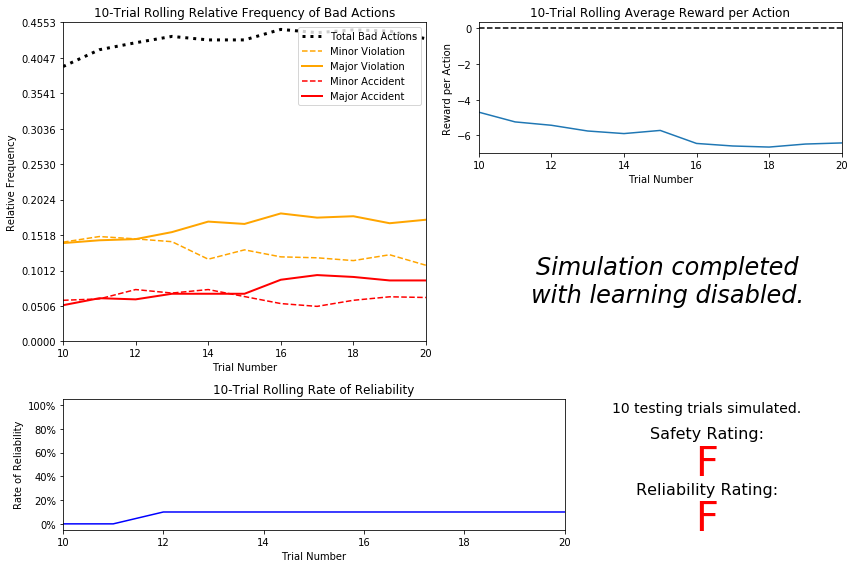

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The driving agent is making mistakes around 40 to 45% of the time.  The logs show a rolling average so spikes are smoothed out. Minor and Major accidents range from around 5 to 10% of the time each.  That means of the bad actions ~= 30% of the bad actions are accidents, so at least that is somewhat encouraging!!

Giving that the agent is driving randomly the rate of reliability at first seems odd, as if it starts to get more reliable, however in peering down in the data more to really see what is happening.

** data['reliability_rate'] = (data['success']*100).rolling(window=10, center=False).mean() **

If you look in the log file you can see on run 12 it completes successfully, hurray!!!  So the graph is not indicating it is getting more reliable it just just smoothing the gain from run 12 out over a longer period.  So instead of seeing a graph where the run is super unreliable and then 1 run where it is super reliable, we get this smoothing.  This is somewhat of the danger beind any chart or data and why accounting joke of ask an accountant what 1 + 1 is and they will say, what do you want it to be.  Lifo and fifo for inventory costs or linear or exponential depreciation are easy ways to kind of manipulate the data to look the way you intend it.  So it is important to drill down in the numbers especially when their may be weighted scores to certain events instead of raw numbers

The agent appears to average negative rewards for every action.  Do the rewards suggest it has been penalized heavily?  The answer to this on the GMAT would be, not enough information to make a decision.  How do I quantify heavily?  The potential fallacy here is that it would appear that is 45% of actions are bad and the agent gets around -5.5 on average per action, he is probably scoring lower maybe like -10 even but on some actions getting 0 or 1 to average out around that mark.  Of course though the agent could be getting 0 on pretty much every action and getting one -1500 etc that then gets averaged out or shows in the rolling, of course I looked at the data so I know the answer but don't want to forget the phrase that all models are wrong, some are useful.  But yes the rewards appear the agent is penalized on average.

As the number of trials increases the outcomes do not seem to be changing significantly.  Some things may make you feel like they might keep increasing such as the rolling rate of reliability, say if the agent had another successful run you would see another uptick of the graph and it would make it seem like it would keep randomly increasing at intervals, however the rolling period would expire for each of this successful runs and it would lower itself out.

The smart cab would not be considered safe or reliable for passengers.  I don't think many people would get in a car that only go them to where they wanted ~= 5% of the time or got into an accident ~= 15% of the time.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

For safety left,right,oncoming would be the most important.  Light could be important if left, right and oncoming did not correctly return all vehicles intention, for example I think it real like, you could be at an intersection and the light is red but there is no cars in the left, right or oncoming sections, so you could start to enter the intersection and someone could easily pull out of a 7-11 and speed through their green light and hit you.  Basically this would be a failure of the inputs to collect all relevant information.  

Also oncoming doesn't neccesarily mean much for our environment because it looks like we do not have green left arrows, which means we do not really care for the oncoming's desired destination because we will always have the right of way.  However, in reality a sequence like this even without a green arrow, requires  a human to process many lets say microstates, where you could start going forward on a green light with the right a way and the oncoming car tries to turn left.

Efficiency - Well it comes down to the environment rules, for example does a major accident prevent you from reaching the destination, in real life it does but in our environment it does not, what about a minor violation, what is the chance for being caught and detained.  So accidents and violations could be linked to efficiency.  So I think this will get flushed out more once the rules become more clear later on in the project.  But obviously waypoint and light could come into play for efficiency, also deadline could too, although of everything I would be most likely to disregard deadline.  Every decision will be to first avoid violations and accidents and then maximize efficieny, consequently deadline will have no bearing unless the reward for achieving the deadline is so great it offsets the risk of accident and violation.  For example to keep it simple, if I am one space away from the goal with only 1 turn for the deadline and I face a red light, if the reward for keeping the deadline is 5 and the penaly for running a red is -1, then I am going to do it.  Of course other things could come into play by seeing the distance to the goal, I could run an analysis to see how likely I am to occur certain penalties.  This would likely be harder in a real life situation where saying if someone is on my left and intends to go straight with a green light and I run my red light it is not a guarantee that we will collide,  however I am guessing in this simulation it is, again this all comes down to the rules of the game, will the accident occur 100% of the time, will it affect my speed etc.  Will have to see what the rewards are before I decide what the cab is going to do.  

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

I think this question comes down to whether or not we can Brute-force all possible scenarios?

I think this comes down to the size of the grid and whether or not we have inputs for other intersections.  For example, if we have the inputs for every intersection we could determine where every car will be at every step that we are looking at.  For example lets say to get to the goal we have to go up 2 spots and left 2 spots.  Well we face a decision right now to go left or up, which one is better?  Well it depends on the future state, if we have inputs from those intersections we could determine if it is more advantageous to go up or left at this point.  However I believe we do not have this information, or it could be encapsulated in the waypoint which never gives us the transparency to see what it knows, so lets assuming we have the

'waypoint', which is the direction the Smartcab should drive leading to the destination, relative to the Smartcab's heading.
'inputs', which is the sensor data from the Smartcab. It includes 
'light', the color of the light.
'left', the intended direction of travel for a vehicle to the Smartcab's left. Returns None if no vehicle is present.
'right', the intended direction of travel for a vehicle to the Smartcab's right. Returns None if no vehicle is present.
'oncoming', the intended direction of travel for a vehicle across the intersection from the Smartcab. Returns None if no vehicle is present.
'deadline', which is the number of actions remaining for the Smartcab to reach the destination before running out of time.

at the current intersection

waypoint will probably be left, right, forward (I don't think I am going to be getting a back or reverse)
light could be red or green
compared to smartcab cars could be left, right, oncoming or none and they each could have an intent of left right and forward

so that is 3 * 2 * 4^3 = 384,  That seems reasonable enough to brute force each scenario.  However like in decision trees in artificial intelligence you can often 'prune' certain trees.

**REVIEWER FEEDBACK What is the final state size if the right input is removed? **

Sorry this was an oversight after I removed the right state.  The correct total possibilites when removing the right would be
waypoint will probably be left, right, forward (I don't think I am going to be getting a back or reverse)
light could be red or green
compared to smartcab cars could be left, oncoming or none and they each could have an intent of left right and forward

So

3 * 2 * 3^3 = **162**

For example we don't really need all the information based upon certain states
We always need to know if we want to go left, right or forward but lets say the light is red, if the light is red we don't really care about the other cars unless I can justify rewards high enough for reaching the goal by the deadline at the expense of safety and reliability.  

And if it is green if waypoint is left I only care about oncoming, if waypoint is straight I don't care about left, right, oncoming, and if it is right I also don't care about left, right oncoming.  
Basically green means you can go straight or right without caring about inputs and can go left if oncoming is not going forward.
Red means you cannot go straight or left but can go right unless left is going forward.

So i really do not have that many scenarios in reality if I do some pruning.

Right and Green and N/A, Right and Red left-forward, Right and Red N/A, Forward and Red N/A, Forward and Green N/A, Left and Red N/A, Left and Green oncoming-forward, Left and Green N/A.

That is only 8 scenarios, yea!!!!  I guess that is why we humans can drive.

Narrow it down to less

Green and oncoming-forward
Green and not oncoming-forward
Red and left-forward
Red and not left-forward

NOTE - After looking at this as my initial approach as I started to code up I realized I was making more of a decision tree for the agent instead of letting it learn, this would also make me have to change the rewards code in the environment file so to go along with process and instead of having a more if then approach, I decided to open it up and allow the cab to consider all different scenarios, IE consider going forward on red and let the rewards kind of train it and see if it came up with the same end system.

That being said i am going to remove rights as an option because I really never care about whats on the right.

**REVIEWER FEEDBACK - Please state why and how the left, right, and oncoming inputs are relevant to the agent's learning safety and efficiency. If you are dropping the right input, please discuss why this information can be disregarded.**

The left, right and oncoming inputs give us an indication of other cars in the area and their driving direction.  We need to be cognitive of these inputs in order to avoid collisions and safety issues.  For example left cars existance and specifically the state of left-forward we need to be aware of when we want to turn right on a red light.  Oncoming-forward is important if we are going left on a green light.  I am choosing to drop the right input because there is never a state where the state of right will play into our decision.  For the states of right could be, null, left, right, forward.  However if we look through all of our states there will never be a time where we need to consider what the right value will be.  It operates completely indepenedent from what our decisions will be.  Therefore since we never need to consider it, we can eliminate it and reduce the total number of possible states achievable, which will then in turn help our learning agent to learn on only relevant states, and not spend time learning things that will never be used.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

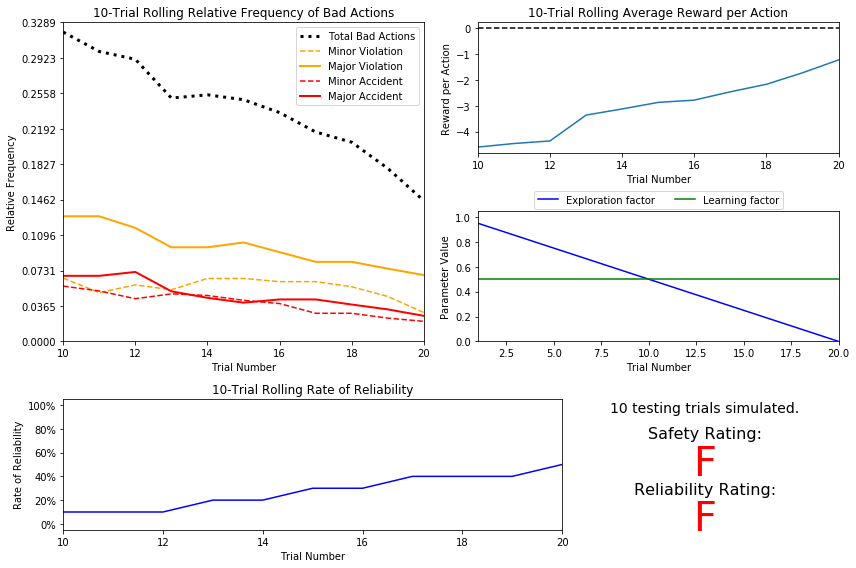

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

There are similarities between the basic driving agent the the default Q-Learning agent.  Mainly the end result of a F for both Safety and Reliability.  Outside of that you start to see the Q-Learning agent starting off poorly but getting better on reliability and number of bad actions overtime.

The driving agent used 20 trials before testing.  This makes sense as we decrease epsilon by 0.05 every trial so 20 puts epsilon down to zero.  This decaying function is represented in the parameters panel as the exploration factor.  You notice the linear decrease across all the trials starting at 1 at trial 1 and decreasing to 0 at trial 20.  

As the trials increased you can see the action rewards steadily increase towards -2 (-2 doesn't sound like an increase, but considering the average is well below -2 this is in fact an increase).  Total bad actions starts out at about 32% but approachs the 15% area.

In conclusion, although we still have the same safety and reliability rating we definately see the affect of learning as the agent progresses.

A side note, is most of the improvement whether it is reliability, action scores or frequency of bad actions all better themselves mostly linearly.  You don't see any polynomial or exponential curves.  That being said our "grading" system does not seem to have the same linearity, as we have been improving our grades should be improving.  It is likely the grading system follows standard academics where 0-60% say is a F, then it then improves linearly.  This somewhat resembles a exponential curve however really it is just a linear line with slope starting at 60%.  Not a big deal, but just thought of the grading system graph and it is a fairly odd graph if you think about it.  There is a pretty big difference between 59% and 0% but not in regards to grades.  You can see this here to where the first random choice resulted in approximately 43% bad actions by the end of the trials and the learning agen is closer to the 15% at the end of the trial.  43% and 15% is a pretty big difference, however esentially our grading system cannot easily articulate the difference and the net result is the same.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

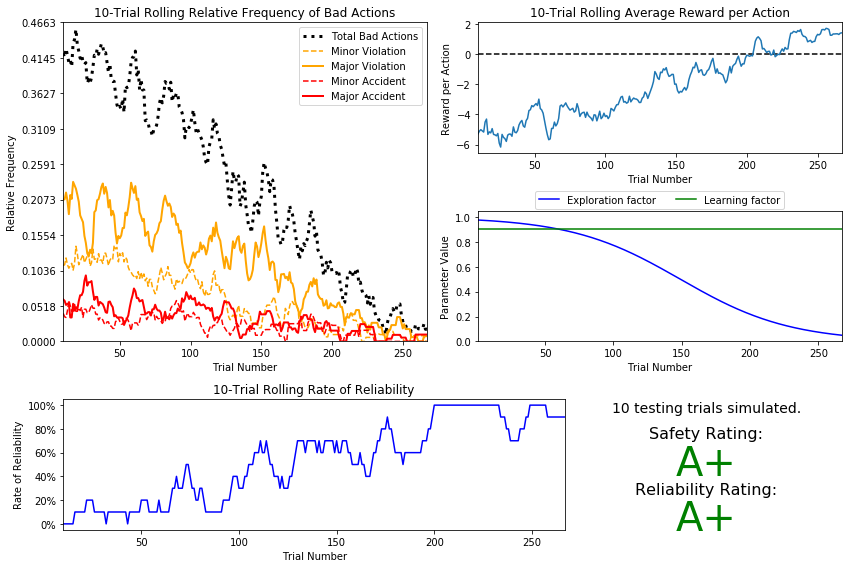

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

WOW, when you said have the battle is tweaking and playing with settings you weren't lying... phew

So I started out playing with different decaying.  I used a kind of custom function to decay accordingly to how I wanted, and as i did so I found that although not drastically better than just a normal linear decay, a sigmoid function well inverse sigmoid I guess.  So assuming that I couldn't use a if else function for my long term decaying function (or maybe you'll tell me I can)I implemented a inverse sigmoid decaying function

1 - ( 1 / ( 1 + math.exp( -0.025 * ( self.current_trial - shift ) ) ) )

with 0.025 being the decay rate, self.current_trial being the training trial number and shift being the point in the trial I wanted the curve to reach halfway

So when I first started tweaking I noticed using linear decay i needed around 300 - 325 training trials before I could get a A+ rating for both categories, with the inverse sigmoid that changed to more the 280 - 300 range.

I chose an alpha to be 0.9 at a constant rate, as it seems that is a common practice.  I was more aggresive on my alpha because although I wouldn't say there is no randomness, this scenario seems to more deterministic than random so I felt it would be better to be more aggresive on alpha

https://en.wikipedia.org/wiki/Q-learning

There was significant improvement in the in the Q-Learner compared to the default Q-Learner.  The biggest affect was just decreasing the epsilon decay rate.  Whether it was linear decay, or logistic decay, basically the biggest affect came from adding in more trials.  This of course makes sense, because it gave the learning agent, well more chances to learn, which of course prepared it better to perform in the testing phase.

I would say that the Q-learner learned an appropriate policy with a caveat, the Q-learner learner did not learn an appropriate policy.  So what does that mean, well even at the end of the learning you can see the Q-agent still has a total bad action around 2 -3 % of the time.  This is well, well above the say my normal driving rate.  If i drive 100 times, I don't have a violation or accident 2 to 3 times (although i think we all know some people that do).  However MY reward is all the cars reward as indicated by the safety and reliability rating of A+.  Once reaching that level there was no additional reward incentivising me to further increase lets say safety to try to lower the percentage of total bad actions.  In other words, why didn't I just extend the trials to lets say 1000 and get even a lower safety score?  Well I did, but I got the same grade (no A+++), so I thought the reward system was set up to reach the A+ level in the shortest amount of time (perhaps that is the intended result of the reward system)

I am satisfied with the safety and reliability ratings of the Smartcab (as defined by this environments reward system). 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

Sure in regards to the optimal policy, I basically explained it in an eariler section but will reiterate here ...

If Green Light and going forward or right then move

If Green Light and going left if oncoming car exists and is going forward then wait else go

** REVIEWER FEEDBACK **
iF Green light and going left: if oncoming car exists and is going right then wait else go
** END OF NEW OPTIMAL POLICY ADDITION **

If Red Light and going left or forward then wait

If Red and going right and left car exists and is going forward wait, else go

Another way to look at it is
Green always means go unless you intend to go forward and it is paired with oncoming-forward
Red always means stop unless you intend to go right and left-forward

In looking through the sim_improved_learning.txt it seems the policy is highest for the given states.  I looked through abou 30, it is difficult to put your mind in the state and get the policy quickly too.  Logic would say that since the final result of the test still had 2-3% of times doing bad_actions, that there would exist some that were suboptimal policies.  With the file being 579 lines long of code and assuming 6 lines for each state (5 lines plus a line break) there are ~= 96 states, so it is likely 2-3 have suboptimal policies.

Here are a few examples from the Q-table, ill match the state with the appropriate policy
(waypoint, inputs['light'], inputs['left'], inputs['oncoming']
('left', 'green', 'left', None)
 -- forward : 0.07
 -- right : 0.02
 -- None : -5.84
 -- left : 1.90
 
 If Green Light and going left if oncoming car exists and is going forward then wait else go
 This is a green light and concoming is None so the policy states you should go left
 You can see this is the highest reward

('left', 'green', 'forward', 'left')
 -- forward : 0.40
 -- right : 0.40
 -- None : -4.94
 -- left : 2.08

 If Green Light and going left if oncoming car exists and is going forward then wait else go
 This is a green light and oncoming is going left so the policy states you should go, which again is the highest reward

('right', 'green', 'forward', 'right')
 -- forward : -0.58
 -- right : 1.63
 -- None : -4.63
 -- left : -19.34
 
 If Green Light and going forward or right then move
  You can see right is the highest reward in line with policy

('left', 'red', 'right', 'left')
 -- forward : -9.01
 -- right : 1.56
 -- None : 2.47
 -- left : -10.37
 
 If Red Light and going left or forward then wait
 None is the highest reward in line with the policy

('forward', 'red', 'right', None)
 -- forward : -10.21
 -- right : -0.33
 -- None : 2.22
 -- left : -10.06
 
 If Red Light and going left or forward then wait
 None is the highest reward in line with the policy
 
 Here is an example within the file where the policy is not correct
('left', 'green', 'right', 'forward')
 -- forward : 1.78
 -- right : 0.00
 -- None : 0.00
 -- left : -17.18
 
 This is a situation where you are going left on a green light but there is an oncoming car.  
 The policy states that in this situation you should do None, however you can see that the reward has forward listed.
 
 This seems like the agent never really got to explore enough to record the rewards of all these situations so it never really good decide between them.  That being said it seems the left green oncoming-forward state generally had problems, here is another example
 
 ('left', 'green', None, 'forward')
 -- forward : 0.82
 -- right : -0.51
 -- None : -4.96
 -- left : -19.99
 
 In this scenario the policy states to do none, however you can see the reward says forward is the best option.  Without completely understanding the reward system it is difficult to know exactly how this state could occur but my guess is this is a result of competing priorities.  In other words, there are lots of different states and the reward system may not take into account every state and try to generalize, lets say for example.  Deadline is enforced and I am 2 spaces away from goal.  The goal is up and to the left.  I run into this scenario.  I know as the smartcab if I do not move then i will not reach my deadline.  However i run left and have a big accident so i dont want to do that.  However if i don't move at all then I won't reach my deadline and that is a big no too!  However if i move forward, I STILL HAVE A CHANGE to meet my deadline on the next move if the condition is correct.  
 

 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.